**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**Load Dataset**

In [3]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
DT=df.iloc[:,0]
DT

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [5]:
ST=df.iloc[:,1]
ST

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Scatter Plot



In [7]:
# Now, we should predict 'delivery time(y)' using 'sorting time(x)'
# It is based on the concept of Straight Line Equation 'y=mx+c', where X=Independent Variable, y=Target Variable
# so, by using Simple Linear Regression we can solve problems related to 'prediction'

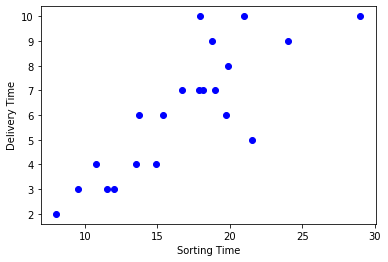

In [41]:
# we use 'Scatter plots' to find the relationship between 2 variables
plt.plot(DT,ST,"bo")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [9]:
# from above scatter plot, we can see a Positive(+) relationship between two variabes
# Positive 'Linear Assosiation' between (ST & DT)

# Correlation

In [10]:
# Now, we use 'Correlation' to know the strength of 'Linear Assosiation'
# where 'r'=Correlation Co-efficient, lies between [+1,-1]
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
#|r|=[0.8-1]---strong correlation, as we have O.825, the strength of the 'LA' is 'Strong'
# Regression Equation-----DT=m(ST)+c

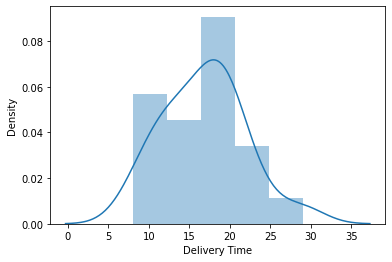

In [12]:
import warnings
warnings.filterwarnings ('ignore')
sb.distplot(DT)

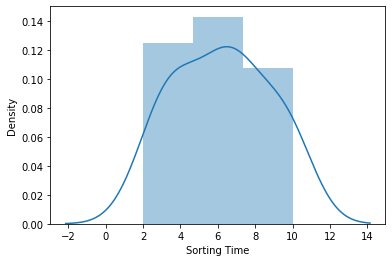

In [13]:
sb.distplot(ST)

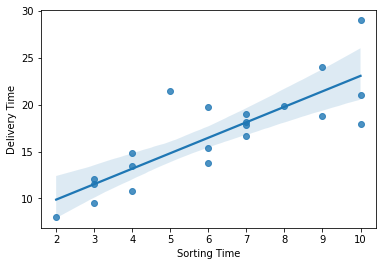

In [14]:
sb.regplot(x=ST,y=DT)

# Build a Model

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("ST~DT",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        11:58:56   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# In the above model, we got R2 value 68%, which is not a great model
# to build a good model, R2 value should be minimum 75%, so we need to improve the accuracy of model

# Build Another Model(2)

In [17]:
# Actual Value - Predicted Value = Residual/Noise/Error (can be +/-)
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [18]:
pred=model.predict()
pred
pd.set_option("display.max_rows", 21) 
pred

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

In [19]:
rmse_lin = np.sqrt(np.mean((np.array(DT)-np.array(pred))**2))
rmse_lin 

10.99092151473798

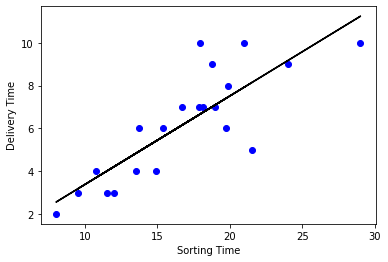

In [40]:
plt.scatter(DT,ST,color='blue')
plt.plot(DT,pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [21]:
model2 = smf.ols('ST~np.log(DT)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                        11:58:57   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DT)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# we used 'log Transformation' in the above model
# still we didn't achieve the target (R2=75%)

# Build Another Model (3)

In [23]:
pred2=model2.predict(pd.DataFrame(ST))
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [24]:
rmse_exp= np.sqrt(np.mean((np.array(DT)-np.array(pred2))**2))
rmse_exp

10.997178422258932

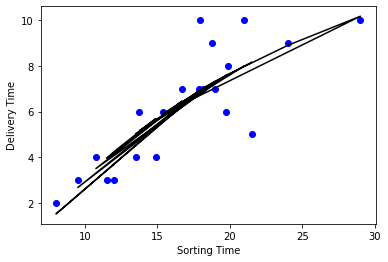

In [44]:
plt.scatter(DT,ST,color='blue')
plt.plot(DT,pred2,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [26]:
model3 = smf.ols("np.log(ST)~DT+np.sqrt(DT)",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     35.04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           6.22e-07
Time:                        11:58:57   Log-Likelihood:                 3.3329
No. Observations:                  21   AIC:                           -0.6657
Df Residuals:                      18   BIC:                             2.468
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.4270      1.646     -2.689      0.015      -7.886      -0.968
DT             -0.2231      0.101     -2.199      0.041      -0.436      -0.010
np.sqrt(DT)     2.4438      0.823      2.971      0.008       0.715       4.172
==============================================================================
Omnibus:                        1.396   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.851
Skew:                          -0.490   Prob(JB):                        0.653
Kurtosis:                       2.883   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred3_log=model3.predict(pd.DataFrame(DT))
pred3_log

0     2.086210
1     1.539897
2     2.026712
3     2.190040
4     2.262517
5     1.722591
6     1.985853
7     0.985625
8     1.918346
9     1.971324
10    2.030835
11    1.186948
12    1.832004
13    1.294394
14    1.364953
15    1.679742
16    1.566872
17    1.931961
18    0.700135
19    1.913729
20    2.107180
dtype: float64

In [28]:
model3.params

Intercept     -4.426964
DT            -0.223135
np.sqrt(DT)    2.443824
dtype: float64

In [29]:
pred3=np.exp(pred3_log)
pred3

0     8.054332
1     4.664109
2     7.589091
3     8.935573
4     9.607237
5     5.599017
6     7.285263
7     2.679487
8     6.809689
9     7.180175
10    7.620446
11    3.277065
12    6.246395
13    3.648786
14    3.915538
15    5.364171
16    4.791638
17    6.903037
18    2.014024
19    6.778320
20    8.225013
dtype: float64

In [30]:
rmse_lin3= np.sqrt(np.mean((np.array(DT)-np.array(pred3))**2))
rmse_lin3

11.135784078988689

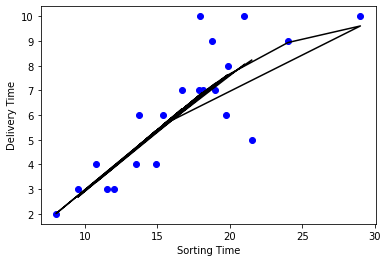

In [45]:
plt.scatter(DT,ST,color='blue')
plt.plot(DT,pred3,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [33]:
model3.resid_pearson

array([ 0.97027972, -0.68879207, -1.0535853 ,  0.03221611,  0.17967695,
        0.31016875, -0.179116  ,  0.50666114,  1.72302269,  1.01299614,
        0.2179643 ,  0.89391848,  0.5107816 , -0.87793649, -1.19433714,
       -1.3158924 ,  1.0084506 ,  0.0625493 , -0.03133341,  0.14430696,
       -2.23199993])

In [34]:
# we used 'log & Sqrt Transformation' in the above model
# Hence, we achieved the target (R2=75%)

# Model Predictions

In [50]:
Y=model3.predict()
Y

array([2.08621012, 1.53989684, 2.02671181, 2.1900403 , 2.26251665,
       1.72259101, 1.9858535 , 0.9856255 , 1.91834642, 1.97132372,
       2.03083492, 1.18694815, 1.83200448, 1.29439448, 1.36495267,
       1.67974189, 1.56687228, 1.93196149, 0.70013462, 1.91372931,
       2.10717988])

In [46]:
# Manual prediction for sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834